In [1]:
import winsor_q2_bowtie_structure_methods as winsor2
import snap
import numpy as np
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

In [2]:
# read in the networks
g_epinions, g_email = winsor2.read_graphs(toy=False)
print("g_epinions N={} E={}".format(g_epinions.GetNodes(), g_epinions.GetEdges()))
print("g_email N={} E={}".format(g_email.GetNodes(), g_email.GetEdges()))

g_epinions N=75879 E=508837
g_email N=265214 E=420045


In [3]:
# question 2.1: Consider the nodes with IDs...
def print_results(args):
    g_name = args[0]
    node = args[1]
    to_list = args[2]
    from_list = args[3]
    component_list = args[4]

    print("{} node {} can reach {} and can be reached by {}. It's component has {} nodes.".format(
        g_name,
        node,
        len(to_list),
        len(from_list),
        len(component_list)))

print_results(winsor2.consider_node("Epinions", g_epinions, 9809))
print_results(winsor2.consider_node("Epinions", g_epinions, 1952))
print_results(winsor2.consider_node("EU Email", g_email, 189587))
print_results(winsor2.consider_node("EU Email", g_email, 675))
    
print("\nWe conclude:")
print("Epinions 9809 is a member of the OUT component.  There is a tendril to which it is linked")
print("Epinions 1952 is a menmber of the IN component.  There is a tendral that is linked to it")
print("EU Email 189587 is a member of the SCC component.")
print("EU Email 675 is a member of the OUT component.  There is a tendril to which it is linked")

Epinions node 9809 can reach 1 and can be reached by 56460. It's component has 1 nodes.
Epinions node 1952 can reach 47677 and can be reached by 1. It's component has 1 nodes.
EU Email node 189587 can reach 52103 and can be reached by 185226. It's component has 34203 nodes.
EU Email node 675 can reach 1 and can be reached by 185240. It's component has 1 nodes.

We conclude:
Epinions 9809 is a member of the OUT component.  There is a tendril to which it is linked
Epinions 1952 is a menmber of the IN component.  There is a tendral that is linked to it
EU Email 189587 is a member of the SCC component.
EU Email 675 is a member of the OUT component.  There is a tendril to which it is linked


In [4]:
# Question 2.2 - Random-Start BFS (Eopinions)
Rnd = snap.TRnd(42)
Rnd.Randomize()

N = 100
list_out_epinions = [None] * N
list_in_epinions = [None] * N
for n in range(N):
    NId = g_epinions.GetRndNId(Rnd)
    list_out_epinions[n] = len(winsor2.get_set_of_nodes_from_n(g_epinions, NId))
    list_in_epinions[n] = len(winsor2.get_set_of_nodes_to_n(g_epinions, NId))

list_out_epinions.sort(reverse=True)
list_in_epinions.sort(reverse=True)

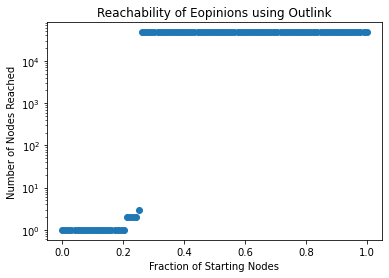

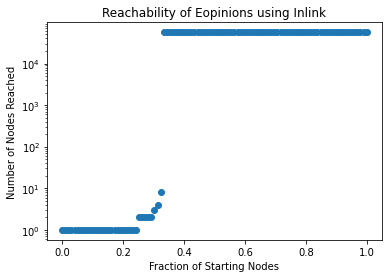

In [5]:
winsor2.chart_reachability("Eopinions", "Outlink", list_out_epinions)
winsor2.chart_reachability("Eopinions", "Inlink", list_in_epinions)

In [6]:
N = 100
list_out_eu_email = [None] * N
list_in_eu_email = [None] * N
for n in range(N):
    NId = g_email.GetRndNId(Rnd)
    list_out_eu_email[n] = len(winsor2.get_set_of_nodes_from_n(g_email, NId))
    list_in_eu_email[n] = len(winsor2.get_set_of_nodes_to_n(g_email, NId))

list_out_eu_email.sort(reverse=True)
list_in_eu_email.sort(reverse=True)

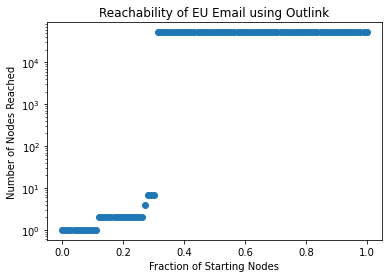

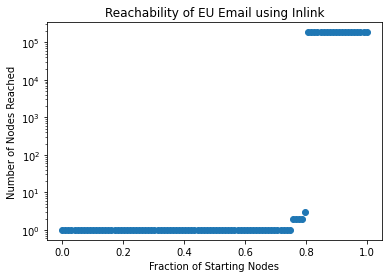

In [8]:
winsor2.chart_reachability("EU Email", "Outlink", list_out_eu_email)
winsor2.chart_reachability("EU Email", "Inlink", list_in_eu_email)

In [ ]:
# Question 2.3 - Size of Bowtie Regions

# Following Broder et al we 
# 1 Find size of the large WCC
# 2 Using BFS foward/backward we find (SCC+IN) and (SCC+OUT)
# 2 From 1 and 2 solve for SCC, IN, OUT
# 3 Compute number of tendrals as WCC - (IN+SCC+OUT)

In [49]:
# Eopinions - size of Borwtie Regions
winsor2.compute_size_of_bowtie_regions_and_print("Epinions", g_epinions, list_in_epinions, list_out_epinions)

Epinions:
Number of nodes is 75879
Number of nodes in the large SCC is 32223
Number of nodes in the large WCC is 75877
thus...
The SCC constitutes 42% of the nodes in the graph

From our random sampling and BFS...
bfs-forward (SCC+OUT) gives 56463 nodes
bfs-backward (IN+SCC) gives 47681 nodes
thus we calculate [IN, SCC, OUT] as 15458.0 32223.0 24240.0

Tendrals = (WCC - IN - SCC - OUT) = 3956.0


In [50]:
# EU Email - size of Borwtie Regions
winsor2.compute_size_of_bowtie_regions_and_print("EU Email", g_email, list_in_eu_email, list_out_eu_email)


EU Email:
Number of nodes is 265214
Number of nodes in the large SCC is 34203
Number of nodes in the large WCC is 224832
thus...
The SCC constitutes 13% of the nodes in the graph

From our random sampling and BFS...
bfs-forward (SCC+OUT) gives 185227 nodes
bfs-backward (IN+SCC) gives 52104 nodes
thus we calculate [IN, SCC, OUT] as 17901.0 34203.0 151024.0

Tendrals = (WCC - IN - SCC - OUT) = 21704.0
